<a href="https://colab.research.google.com/github/kvishnu78/ML-Algorithms/blob/main/KNN_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
from sklearn.model_selection import train_test_split#to split training and testing sample
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")#loading the dataset
dataset.isnull().sum()#checking for null values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))#removing the numerical null values using mean value, and fillna is used to fill empty values
dataset.isnull().sum()#rechecking number of empty cells

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
x = dataset[features]
y = dataset['quality'] 

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=3,shuffle=True)#to divide into random test and train samples,
#  .10 indicates 10% data for testing, random state=3 is used to control the shuffles and reproduce the splits,shuffle indiactes shuffle the data before splitting

Fitting the model for different K values and analysing the variation in Evaluation metrics

CONFUSION MATRIX'S FOR DIFFERNT K:


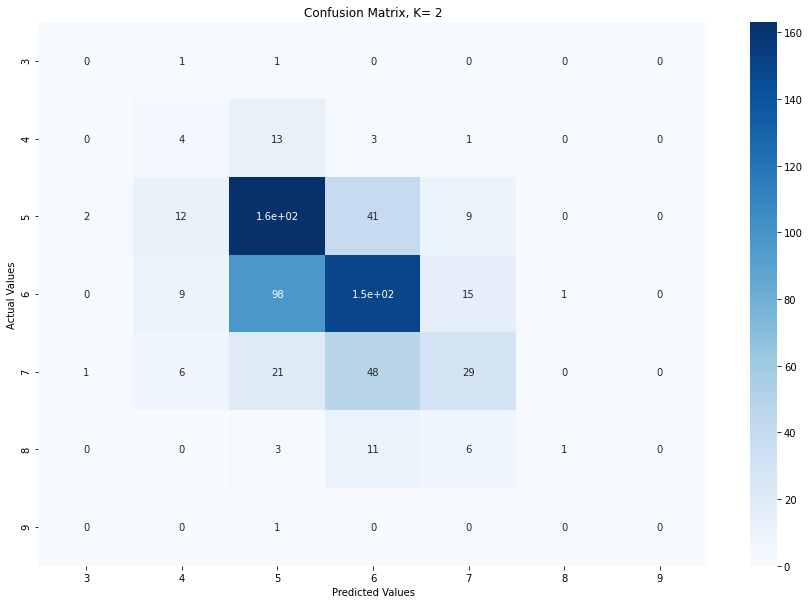

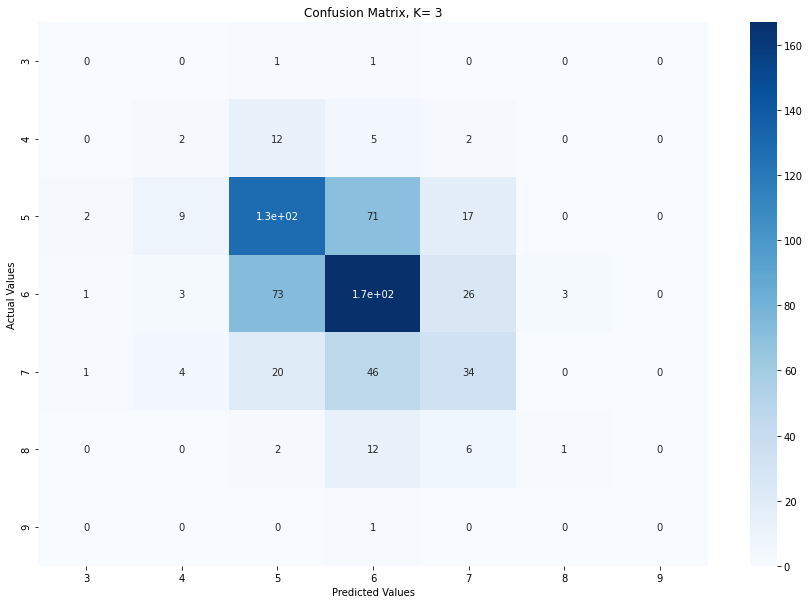

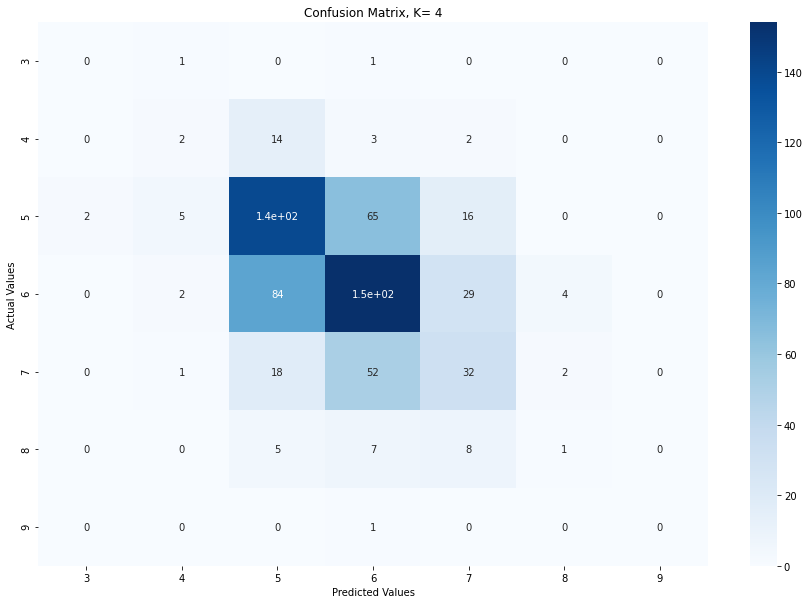

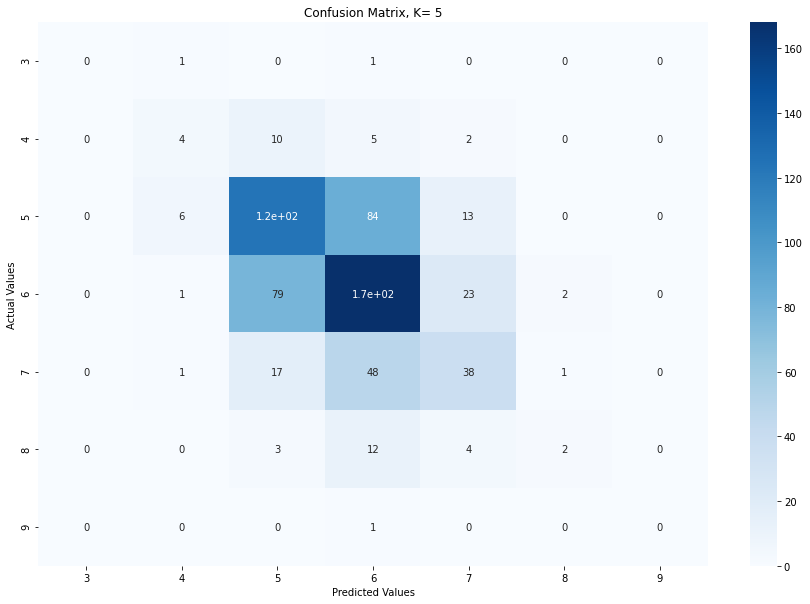

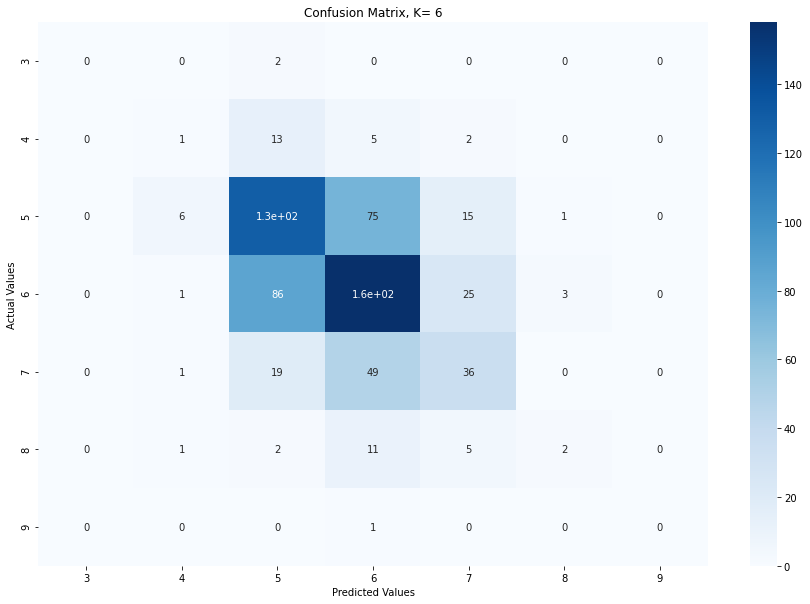

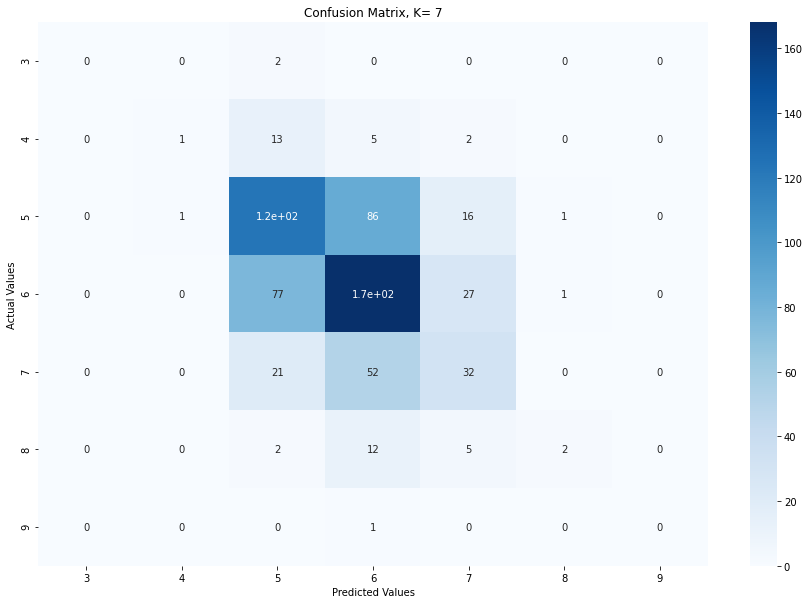

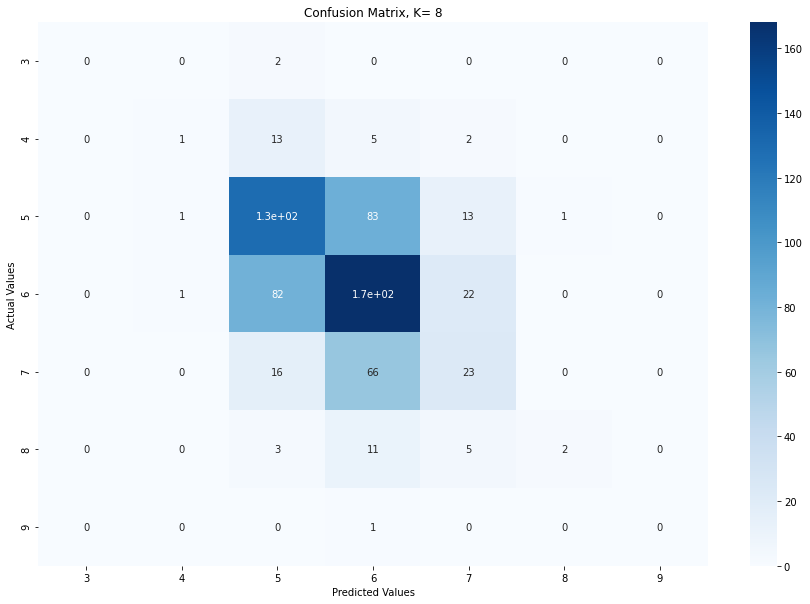

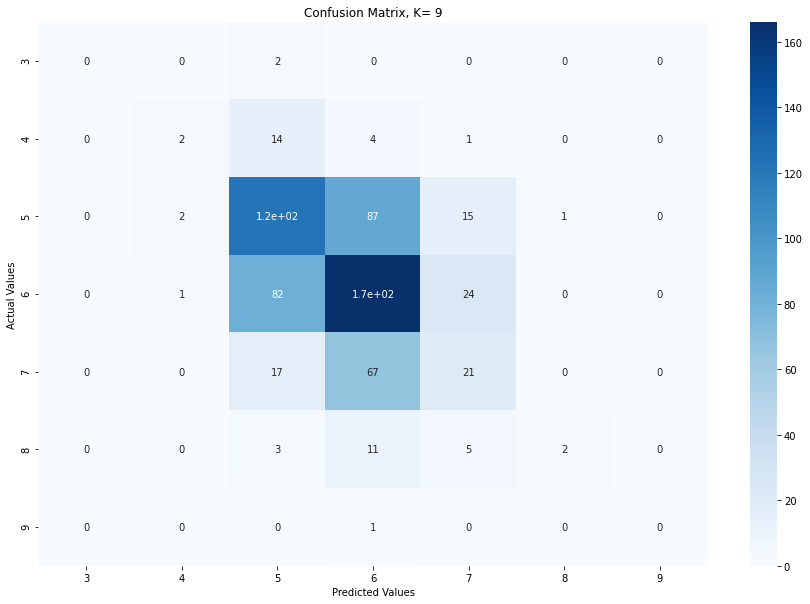



When K is between  2  and  9
Maximum Precison= 63.22  for K= 6
Maximum Recall= 25.85  for K= 4
Maximum Accuracy= 53.38  for K= 1
  K    Accuracy    Recall    Precision
---  ----------  --------  -----------
  2       53.38     25.45        46.35
  3       51.08     23.46        40.78
  4       50.46     23.2         39.59
  5       51.69     25.85        60.59
  6       50.31     23.39        55.88
  7       50.15     22.93        63.22
  8       49.69     22.08        62.62
  9       48.15     21.94        62.67
METRICS FOR DIFFERNT K:



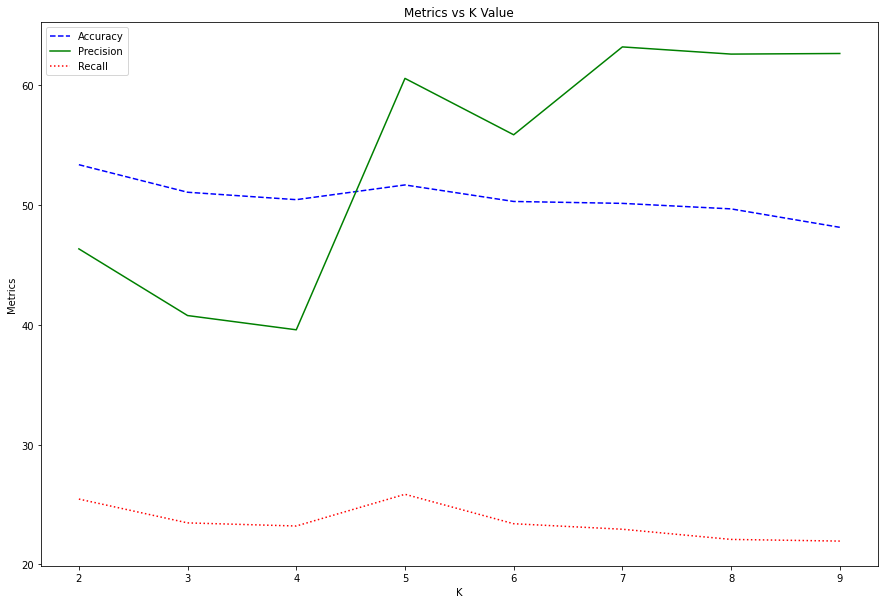

In [ ]:
accuracy=[]
precision=[]
recall=[]
met=[]
start=2
end=10
increment=1

def confusion(test_y,pred_y,i):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(15,10))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix, K= '+str(i)
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")


print("CONFUSION MATRIX'S FOR DIFFERNT K:")
for i in range(start,end,increment):
    KNN=KNeighborsClassifier(n_neighbors=i,p=2)#p decides the distance metrics, p=2 means euclidean distance(also the default value)
    KNN.fit(train_x,train_y)
    pred_y=KNN.predict(test_x)
    acc=round(100*metrics.accuracy_score(test_y,pred_y),2)
    pre=round(100*metrics.precision_score(test_y,pred_y,average='macro',zero_division=1),2)
    rec=round(100*metrics.recall_score(test_y,pred_y,average='macro'),2)  
    met.append([i,acc,rec,pre])
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    confusion(test_y,pred_y,i)
    # print(metrics.confusion_matrix(test_y,pred_y))

    

print("When K is between ",start," and ", end-1)
print("Maximum Precison=",max(precision)," for K=",precision.index(max(precision))+1)
print("Maximum Recall=",max(recall)," for K=",recall.index(max(recall))+1)
print("Maximum Accuracy=",max(accuracy)," for K=",accuracy.index(max(accuracy))+1)

print(tabulate(met,headers=["K","Accuracy","Recall","Precision"]))


print("METRICS FOR DIFFERNT K:\n")
plt.figure(figsize=(15,10))
plt.plot(range(start,end,increment),accuracy,color='blue',linestyle='dashed',markersize=10,label="Accuracy")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values
plt.plot(range(start,end,increment),precision,color='green',linestyle='solid',markersize=10,label="Precision")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values
plt.plot(range(start,end,increment),recall,color='red',linestyle='dotted',markersize=10,label="Recall")
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values

plt.title('Metrics vs K Value')
plt.xlabel('K')
plt.ylabel('Metrics')

leg = plt.legend();
# plt.legend(frameon=False, loc='lower center', ncol=2)

Printing Variation in Accuracy


Text(0, 0.5, 'Accuracy')

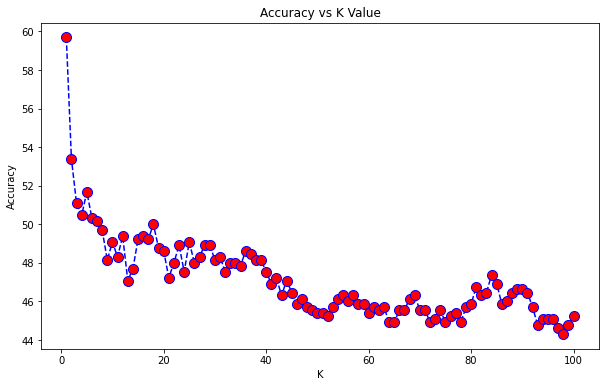

In [ ]:
start=1
end=101
accuracy=[]
for i in range(start,end):
    KNN=KNeighborsClassifier(n_neighbors=i,p=2)#p decides the distance metrics, p=2 means euclidean distance(also the default value)
    KNN.fit(train_x,train_y)
    pred_y=KNN.predict(test_x)
    acc=round(100*metrics.accuracy_score(test_y,pred_y),2)
    accuracy.append(acc)

plt.figure(figsize=(10,6))
plt.plot(range(start,end),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
#color,linestyle,marker,markerfacecolor,markersize describe plot properties
#first 2 parameters are the x and y values
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
